# CSI - 5155 ML project 
## Supervised and Semi-supervised Learning on clinical diabetes dataset

###Importing all the packages

In [114]:
!pip install category_encoders
!pip install -U imbalanced-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
import timeit
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve, auc
import sklearn.metrics as metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from IPython.display import display
from sklearn.tree import export_graphviz
import graphviz
from graphviz import Source
import pydotplus
import collections
from IPython.display import Image  
from sklearn import tree
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
from prettytable import PrettyTable
from sklearn.manifold import TSNE
from sklearn.inspection import permutation_importance
from datetime import datetime



Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.6/dist-packages (0.7.0)


In [115]:
#making connection to google drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# A: Feature engineering, supervised learning & evaluation of results 

In [116]:
#loading the data
data=pd.read_csv('/content/drive/MyDrive/diabetic_data.csv')

## Data Cleaning

In [117]:
#replacing question marks with nan value
data= data.replace("?", np.nan)

In [118]:
#checking the percentage of the null values
print(round(data.isnull().mean()*100,2))

encounter_id                 0.00
patient_nbr                  0.00
race                         2.23
gender                       0.00
age                          0.00
weight                      96.86
admission_type_id            0.00
discharge_disposition_id     0.00
admission_source_id          0.00
time_in_hospital             0.00
payer_code                  39.56
medical_specialty           49.08
num_lab_procedures           0.00
num_procedures               0.00
num_medications              0.00
number_outpatient            0.00
number_emergency             0.00
number_inpatient             0.00
diag_1                       0.02
diag_2                       0.35
diag_3                       1.40
number_diagnoses             0.00
max_glu_serum                0.00
A1Cresult                    0.00
metformin                    0.00
repaglinide                  0.00
nateglinide                  0.00
chlorpropamide               0.00
glimepiride                  0.00
acetohexamide 

In [119]:
#taking on the first encounter of the patient and dropping the rest
data = data.drop_duplicates(subset = ['patient_nbr'], keep = 'first')

In [120]:
# as we can see that 96.86% of the rows are empty in weight column, it is better to drop it. Same goes with other columns.
data = data.drop(columns = ['encounter_id', 'patient_nbr', 'weight','payer_code', 'medical_specialty'])

In [121]:
#gender consists of an Unknown/Invalid value which can be removed
data = data[(data.gender!= 'Unknown/Invalid')]

In [122]:
#checking the percentage of null values
print(round(data.isnull().mean()*100,2))

race                        2.72
gender                      0.00
age                         0.00
admission_type_id           0.00
discharge_disposition_id    0.00
admission_source_id         0.00
time_in_hospital            0.00
num_lab_procedures          0.00
num_procedures              0.00
num_medications             0.00
number_outpatient           0.00
number_emergency            0.00
number_inpatient            0.00
diag_1                      0.02
diag_2                      0.41
diag_3                      1.71
number_diagnoses            0.00
max_glu_serum               0.00
A1Cresult                   0.00
metformin                   0.00
repaglinide                 0.00
nateglinide                 0.00
chlorpropamide              0.00
glimepiride                 0.00
acetohexamide               0.00
glipizide                   0.00
glyburide                   0.00
tolbutamide                 0.00
pioglitazone                0.00
rosiglitazone               0.00
acarbose  

In [123]:
data

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,Caucasian,Female,[70-80),1,1,7,9,50,2,33,0,0,0,574,574,250.02,9,None,>7,No,No,No,No,No,No,No,Up,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,>30
101755,Other,Female,[40-50),1,1,7,14,73,6,26,0,1,0,592,599,518,9,None,>8,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
101756,Other,Female,[60-70),1,1,7,2,46,6,17,1,1,1,996,585,403,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
101758,Caucasian,Female,[80-90),1,1,7,5,76,1,22,0,1,0,292,8,304,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


In [124]:
#since the percentage of data which is missing in race, diag_1, diag_2, diag_3 is less, we can drop the null values.
data = data.dropna(axis = 0)

In [125]:
data

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,Caucasian,Male,[50-60),2,1,2,3,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,Caucasian,Female,[70-80),1,1,7,9,50,2,33,0,0,0,574,574,250.02,9,None,>7,No,No,No,No,No,No,No,Up,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,>30
101755,Other,Female,[40-50),1,1,7,14,73,6,26,0,1,0,592,599,518,9,None,>8,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
101756,Other,Female,[60-70),1,1,7,2,46,6,17,1,1,1,996,585,403,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
101758,Caucasian,Female,[80-90),1,1,7,5,76,1,22,0,1,0,292,8,304,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


 ### Analyzing the numerical features using box plot

#### Analysing the "time_in_hospital feature

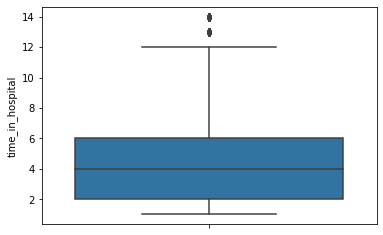

In [137]:
#box plot
sns.boxplot(y="time_in_hospital", data =data)
plt.show()

In [138]:
#Since we can see a few points outside the plot, percentile has been used to check the values present
for i in range(0,110,10):
    var =data["time_in_hospital"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,np.percentile(var, i)))

0 percentile value is 1.0
10 percentile value is 1.0
20 percentile value is 2.0
30 percentile value is 2.0
40 percentile value is 3.0
50 percentile value is 4.0
60 percentile value is 4.0
70 percentile value is 5.0
80 percentile value is 7.0
90 percentile value is 9.0
100 percentile value is 14.0


#### Since it is possible for the a patient to stay in the hospital for 0-14 days, it can be said that there are not outlier points present.

#### Analysing the "num_lab_procedures" feature

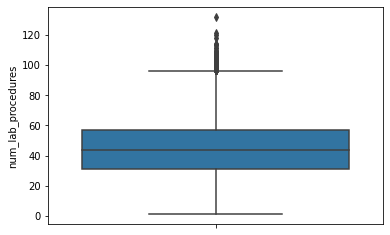

In [139]:
sns.boxplot(y="num_lab_procedures", data =data)
plt.show()

In [140]:
#Since we can see a few points outside the plot, percentile has been used to check the values present
for i in range(0,110,10):
    var =data["num_lab_procedures"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,np.percentile(var, i)))

0 percentile value is 1.0
10 percentile value is 13.0
20 percentile value is 27.0
30 percentile value is 35.0
40 percentile value is 40.0
50 percentile value is 44.0
60 percentile value is 49.0
70 percentile value is 54.0
80 percentile value is 60.0
90 percentile value is 68.0
100 percentile value is 132.0


In [141]:
# Since there is a large difference between the 90th percentile and the 100th percentile, we will look at the percentile range from 90-100
for i in range(90,101):
    var =data["num_lab_procedures"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,np.percentile(var, i)))

90 percentile value is 68.0
91 percentile value is 69.0
92 percentile value is 70.0
93 percentile value is 71.0
94 percentile value is 72.0
95 percentile value is 74.0
96 percentile value is 76.0
97 percentile value is 78.0
98 percentile value is 81.0
99 percentile value is 85.0
100 percentile value is 132.0


In [142]:
# Since there is a large difference between the 99th percentile and the 100th percentile, we will look at the percentile range from 99-100
for i in np.arange(99, 100.1, 0.1):
    var =data["num_lab_procedures"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(np.round(i,2),np.percentile(var, i)))

99.0 percentile value is 85.0
99.1 percentile value is 86.0
99.2 percentile value is 87.0
99.3 percentile value is 88.0
99.4 percentile value is 89.0
99.5 percentile value is 90.0
99.6 percentile value is 92.0
99.7 percentile value is 94.0
99.8 percentile value is 95.0
99.9 percentile value is 98.64399999995658
100.0 percentile value is 131.9999999995198


#### It may or may not be possible for the patient for undergo 132 lab results in the span of 14 days, hence, these points might be outliers.

#### Analysing the "num_medications" feature

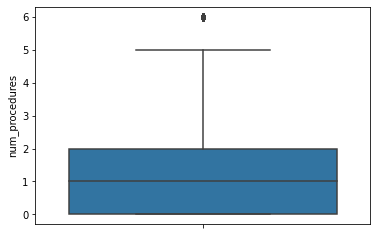

In [143]:
sns.boxplot(y="num_procedures", data =data)
plt.show()

In [144]:
#Since we can see a few points outside the plot, percentile has been used to check the values present
for i in range(0,110,10):
    var =data["num_procedures"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,np.percentile(var, i)))

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.0
50 percentile value is 1.0
60 percentile value is 1.0
70 percentile value is 2.0
80 percentile value is 3.0
90 percentile value is 4.0
100 percentile value is 6.0


In [145]:
for i in range(90,101):
    var =data["num_procedures"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,np.percentile(var, i)))

90 percentile value is 4.0
91 percentile value is 5.0
92 percentile value is 5.0
93 percentile value is 5.0
94 percentile value is 5.0
95 percentile value is 6.0
96 percentile value is 6.0
97 percentile value is 6.0
98 percentile value is 6.0
99 percentile value is 6.0
100 percentile value is 6.0


 #### As we can see from the above percentile values, we can conclude that there are no outliers since it is possible for a patient to undergo upto 6 procedures.

#### Analysing the "num_medications" feature

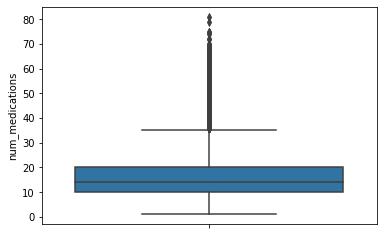

In [146]:
sns.boxplot(y="num_medications", data =data)
plt.show()

In [147]:
#Since we can see a few points outside the plot, percentile has been used to check the values present
for i in range(0,110,10):
    var =data["num_medications"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,np.percentile(var, i)))

0 percentile value is 1.0
10 percentile value is 7.0
20 percentile value is 9.0
30 percentile value is 11.0
40 percentile value is 13.0
50 percentile value is 14.0
60 percentile value is 16.0
70 percentile value is 18.0
80 percentile value is 21.0
90 percentile value is 26.0
100 percentile value is 81.0


In [148]:
# Since there is a large difference between the 90th percentile and the 100th percentile, we will look at the percentile range from 90-100
for i in range(90,101):
    var =data["num_medications"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,np.percentile(var, i)))

90 percentile value is 26.0
91 percentile value is 27.0
92 percentile value is 28.0
93 percentile value is 28.0
94 percentile value is 30.0
95 percentile value is 31.0
96 percentile value is 33.0
97 percentile value is 35.0
98 percentile value is 38.0
99 percentile value is 44.0
100 percentile value is 81.0


### As we can see from the above percentile values, the highest number of medication is 81, and these points might not be outlier points since it is possible for a patient to be prescribed with such a number of medication.

#### Analysing the "number_outpatient" feature

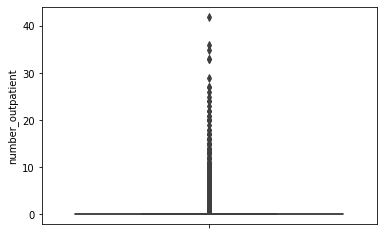

In [34]:
sns.boxplot(y="number_outpatient", data =data)
plt.show()

In [35]:
#Since we can see a few points outside the plot, percentile has been used to check the values present
for i in range(0,110,10):
    var =data["number_outpatient"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,np.percentile(var, i)))

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.0
50 percentile value is 0.0
60 percentile value is 0.0
70 percentile value is 0.0
80 percentile value is 0.0
90 percentile value is 1.0
100 percentile value is 42.0


In [36]:
# Since there is a large difference between the 90th percentile and the 100th percentile, we will look at the percentile range from 90-100
for i in range(90,101):
    var =data["number_outpatient"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,np.percentile(var, i)))

90 percentile value is 1.0
91 percentile value is 1.0
92 percentile value is 1.0
93 percentile value is 1.0
94 percentile value is 2.0
95 percentile value is 2.0
96 percentile value is 2.0
97 percentile value is 3.0
98 percentile value is 3.0
99 percentile value is 5.0
100 percentile value is 42.0


In [37]:
# Since there is a large difference between the 99th percentile and the 100th percentile, we will look at the percentile range from 99-100
for i in np.arange(99, 100.1, 0.1):
    var =data["number_outpatient"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(np.round(i,2),np.round(np.percentile(var, i))))

99.0 percentile value is 5.0
99.1 percentile value is 5.0
99.2 percentile value is 5.0
99.3 percentile value is 5.0
99.4 percentile value is 6.0
99.5 percentile value is 6.0
99.6 percentile value is 7.0
99.7 percentile value is 8.0
99.8 percentile value is 9.0
99.9 percentile value is 13.0
100.0 percentile value is 42.0


### Since it is possible for a patient to visit the hospital 0-42 times a year, we can say that there are no outliers.

#### Analysing the "number_emergency" feature

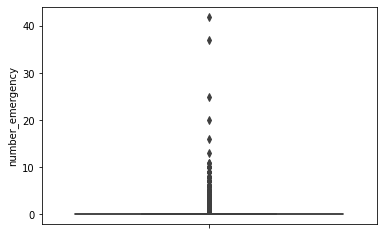

In [39]:
sns.boxplot(y="number_emergency", data =data)
plt.show()

In [40]:
#Since we can see a few points outside the plot, percentile has been used to check the values present
for i in range(0,110,10):
    var =data["number_emergency"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,np.percentile(var, i)))

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.0
50 percentile value is 0.0
60 percentile value is 0.0
70 percentile value is 0.0
80 percentile value is 0.0
90 percentile value is 0.0
100 percentile value is 42.0


In [41]:
# Since there is a large difference between the 90th percentile and the 100th percentile, we will look at the percentile range from 90-100
for i in range(90,101):
    var =data["number_emergency"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,np.percentile(var, i)))

90 percentile value is 0.0
91 percentile value is 0.0
92 percentile value is 0.0
93 percentile value is 1.0
94 percentile value is 1.0
95 percentile value is 1.0
96 percentile value is 1.0
97 percentile value is 1.0
98 percentile value is 1.0
99 percentile value is 2.0
100 percentile value is 42.0


In [42]:
# Since there is a large difference between the 99th percentile and the 100th percentile, we will look at the percentile range from 99-100
for i in np.arange(99, 100.1, 0.1):
    var =data["number_emergency"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(np.round(i,2),np.round(np.percentile(var, i))))

99.0 percentile value is 2.0
99.1 percentile value is 2.0
99.2 percentile value is 2.0
99.3 percentile value is 2.0
99.4 percentile value is 3.0
99.5 percentile value is 3.0
99.6 percentile value is 3.0
99.7 percentile value is 3.0
99.8 percentile value is 4.0
99.9 percentile value is 5.0
100.0 percentile value is 42.0


### As we can see from above, there is a huge difference between the 99.9th percentile and 100th percentile and also, it might not be possible for a patient to have about 45 visits in one year period, hence we can say that there might be a presence of outliers

#### Analysing the "number_inpatient" feature

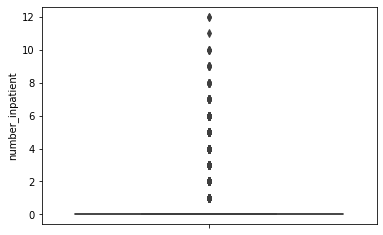

In [43]:
sns.boxplot(y="number_inpatient", data =data)
plt.show()

In [44]:
#Since we can see a few points outside the plot, percentile has been used to check the values present
for i in range(0,110,10):
    var =data["number_inpatient"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,np.percentile(var, i)))

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.0
50 percentile value is 0.0
60 percentile value is 0.0
70 percentile value is 0.0
80 percentile value is 0.0
90 percentile value is 1.0
100 percentile value is 12.0


In [45]:
# Since there is a large difference between the 90th percentile and the 100th percentile, we will look at the percentile range from 90-100
for i in range(90,101):
    var =data["number_inpatient"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,np.percentile(var, i)))

90 percentile value is 1.0
91 percentile value is 1.0
92 percentile value is 1.0
93 percentile value is 1.0
94 percentile value is 1.0
95 percentile value is 1.0
96 percentile value is 1.0
97 percentile value is 2.0
98 percentile value is 2.0
99 percentile value is 3.0
100 percentile value is 12.0


In [46]:
# Since there is a large difference between the 99th percentile and the 100th percentile, we will look at the percentile range from 99-100
for i in np.arange(99, 100.1, 0.1):
    var =data["number_inpatient"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(np.round(i,2),np.round(np.percentile(var, i))))

99.0 percentile value is 3.0
99.1 percentile value is 3.0
99.2 percentile value is 3.0
99.3 percentile value is 3.0
99.4 percentile value is 4.0
99.5 percentile value is 4.0
99.6 percentile value is 4.0
99.7 percentile value is 4.0
99.8 percentile value is 5.0
99.9 percentile value is 6.0
100.0 percentile value is 12.0


### Since it is possible for a patient to visit the hospital as an inpatient upto 12 times, we can conclude that there are no outliers

#### Analysing the "number_diagnoses" feature

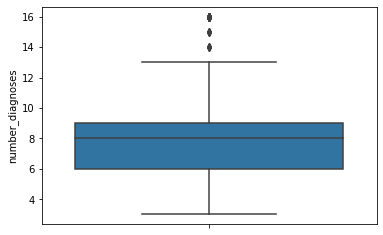

In [47]:
sns.boxplot(y="number_diagnoses", data =data)
plt.show()

In [48]:
#Since we can see a few points outside the plot, percentile has been used to check the values present
for i in range(0,110,10):
    var =data["number_diagnoses"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,np.percentile(var, i)))

0 percentile value is 3.0
10 percentile value is 5.0
20 percentile value is 5.0
30 percentile value is 6.0
40 percentile value is 7.0
50 percentile value is 8.0
60 percentile value is 9.0
70 percentile value is 9.0
80 percentile value is 9.0
90 percentile value is 9.0
100 percentile value is 16.0


In [49]:
# Since there is a large difference between the 99th percentile and the 100th percentile, we will look at the percentile range from 99-100
for i in range(90,101):
    var =data["number_diagnoses"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,np.percentile(var, i)))

90 percentile value is 9.0
91 percentile value is 9.0
92 percentile value is 9.0
93 percentile value is 9.0
94 percentile value is 9.0
95 percentile value is 9.0
96 percentile value is 9.0
97 percentile value is 9.0
98 percentile value is 9.0
99 percentile value is 9.0
100 percentile value is 16.0


### As we can see from above that there is no huge difference between the 99th percentile and 100th percentile, we can say that there are no outliers

### From the above data cleaning process, we can say that there are not many outliers present in the data.

In [51]:
#removing the outliers
data=data[(data.number_emergency>=0) & (data.number_emergency < 10)]

data=data[(data.num_lab_procedures>=0) & (data.num_lab_procedures < 100)]

## Data Preprocessing

In [52]:
#label encoding for the feature "age"
label_enc = {"age": {"[0-10)": 0, "[10-20)": 1, "[20-30)": 2, "[30-40)": 3,"[40-50)": 4, 
                                  "[50-60)": 5, "[60-70)": 6, "[70-80)":7, "[80-90)": 8, "[90-100)":9 }, "change" : {"Ch" : 1, "No": 0}, "diabetesMed": {"Yes": 1, "No": 0},"readmitted": {">30":0,"NO":0,"<30":1}  }

data.replace(label_enc, inplace=True)

#label encoding for the feature "gender"
label_gender = {"gender": {"Female": 0, "Male": 1}}
data.replace(label_gender, inplace = True)


In [53]:
#one hot encoding for the features : race, A1Cresult, max_glu_serum
data = pd.get_dummies(data, columns = ['race', 'A1Cresult', 'max_glu_serum'])

In [54]:
#label encoding for the following medicines
meds = ['metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']



for i in meds:
    data[i] = data[i].replace(['No', 'Steady','Up', 'Down'], [0,2,3,1])
    #data[i] = data[i]
    

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68283 entries, 1 to 101765
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    68283 non-null  int64 
 1   age                       68283 non-null  int64 
 2   admission_type_id         68283 non-null  int64 
 3   discharge_disposition_id  68283 non-null  int64 
 4   admission_source_id       68283 non-null  int64 
 5   time_in_hospital          68283 non-null  int64 
 6   num_lab_procedures        68283 non-null  int64 
 7   num_procedures            68283 non-null  int64 
 8   num_medications           68283 non-null  int64 
 9   number_outpatient         68283 non-null  int64 
 10  number_emergency          68283 non-null  int64 
 11  number_inpatient          68283 non-null  int64 
 12  diag_1                    68283 non-null  object
 13  diag_2                    68283 non-null  object
 14  diag_3               

In [56]:
#removing the null/not assigned/death/hospice values from the nomial features : admission_type_id, discharge_disposition_id, admission_source_id

data = data[(data.admission_type_id != 5) & (data.admission_type_id != 6) & (data.admission_type_id != 8)]
data = data[(data.discharge_disposition_id != 11) & (data.discharge_disposition_id != 13) & (data.discharge_disposition_id != 14) & (data.discharge_disposition_id != 18) & (data.discharge_disposition_id != 19) & (data.discharge_disposition_id != 20) & (data.discharge_disposition_id != 21) & (data.discharge_disposition_id != 25) & (data.discharge_disposition_id != 26)]
data = data[(data.admission_source_id != 9) & (data.admission_source_id != 15) & (data.admission_source_id != 17) & (data.admission_source_id != 20) & (data.admission_source_id != 21) & (data.admission_source_id != 26) & (data.discharge_disposition_id != 21)]

In [57]:
#replacing all the values with the correspoding ID
label = {'admission_type_id' :{1: "emergency", 2 : 'urgent', 3: 'elective', 4 : 'newborn', 7: 'trauma'}} 
data.replace(label, inplace=True)


label_discharge = {'discharge_disposition_id' :{ 1 : 'Discharged to home', 2 : 'Discharged/transferred', 3 : 'Discharged/transferred', 4: 'Discharged/transferred', 5 : 'Discharged/transferred', 6: 'Discharged/transferred', 8 : 'Discharged/transferred', 10: 'Discharged/transferred', 15: 'Discharged/transferred' ,16: 'Discharged/transferred', 17: 'Discharged/transferred' , 22: 'Discharged/transferred', 23: 'Discharged/transferred', 24:'Discharged/transferred' , 30:'Discharged/transferred' , 27:'Discharged/transferred', 28:'Discharged/transferred', 29: 'Discharged/transferred', 7 :'LeftAMA' , 9 : 'Admitted as inpatient', 12: 'Admitted as inpatient' }} 
data.replace(label_discharge, inplace=True)




label_admission_source = {'admission_source_id': {1:'referral' ,2: 'referral',3: 'referral' , 4: 'transfer', 5: 'transfer', 6: 'transfer', 7:'emergency', 8:'court/law enforcement',10: 'transfer', 11:'birth/delivery', 12: 'birth/delivery', 13: 'birth/delivery', 14: 'birth/delivery',18: 'transfer', 19:'readmission', 22: 'transfer', 23:'birth/delivery', 24: 'birth/delivery', 25:'transfer' }}
data.replace(label_admission_source, inplace=True)


In [58]:
#one hot encoding of the features : discharge_disposition_id, admission_source_id, admission_type_id
data = pd.get_dummies(data, columns = ['discharge_disposition_id', 'admission_source_id', 'admission_type_id'])

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56042 entries, 1 to 101765
Data columns (total 66 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   gender                                           56042 non-null  int64 
 1   age                                              56042 non-null  int64 
 2   time_in_hospital                                 56042 non-null  int64 
 3   num_lab_procedures                               56042 non-null  int64 
 4   num_procedures                                   56042 non-null  int64 
 5   num_medications                                  56042 non-null  int64 
 6   number_outpatient                                56042 non-null  int64 
 7   number_emergency                                 56042 non-null  int64 
 8   number_inpatient                                 56042 non-null  int64 
 9   diag_1                                

In [60]:
import re

def convert_val(diag):
  new = []
  for i in diag:
      if (re.match('^[0-9\.]*$',i) or re.match('^[0-9]*$',i)):
        i = float(i)
        new.append(i)
      else:
        i = str(i)
        new.append(i)
  return new
 
diag_1_data = data['diag_1']  
diag_2_data = data['diag_2']  
diag_3_data = data['diag_3']  

diag_1 = convert_val(diag_1_data)
diag_2 = convert_val(diag_2_data)
diag_3 = convert_val(diag_3_data)
   


In [61]:
#grouping the values present in diag_1,diag_2,diag_3 with respect to the ICD codes
def groups(new):
  for i in range(len(new)):
    if(type(new[i]) == float):
      if (new[i] in range(390,460) or new[i] == 785):
        new[i] = 'circulatory'
      elif (new[i] in range(460,520) or new[i] == 786):
        new[i] = 'respiratory'
      elif (new[i] in range(520,579) or new[i] == 787):
        new[i] = 'digestive'
      elif (new[i] in range(800,1000)):
        new[i] = 'injury'
      elif (new[i] in range(710,740)):
        new[i] ='musculoskeletal'
      elif (new[i] in range(580, 630) or new[i] == 788):
        new[i] ='genitourinary'
      elif (new[i] in range(140,240) or new[i] in range(680,710)  or new[i] in range(1,140) or new[i] in range(790,800) or  new[i] == 780 or  new[i] == 781 or  new[i] == 784 or new[i] in range(240,250) or new[i] in range(251,280)):
        new[i] = 'Neoplasms'

      elif (new[i] in range(1, 140) or new[i] == 782 or new[i] in range(680, 709)  or new[i] in range(290, 320) or new[i] in range(280, 290) or new[i] in range(320, 360) or new[i] in range(630, 680) or new[i] in range(360, 390) or new[i] in range(740, 760)):
        new[i] = 'Other'
      else:
        new[i] = 'diabetes'
    else:
      new[i] = 'other'
  return new
    
final_diag_1 = groups(diag_1)
final_diag_2 = groups(diag_2)
final_diag_3 = groups(diag_3)   
      
    

In [62]:
data = data.drop(columns=['diag_1', 'diag_2','diag_3'])

In [63]:
data['diag1'] = final_diag_1
data['diag2'] = final_diag_2
data['diag3'] = final_diag_3

In [64]:
#one hot encoding for the columns: 'diag1', 'diag2', 'diag3'
data = pd.get_dummies(data, columns = ['diag1', 'diag2', 'diag3'])

# Task 1: Using readmitted as the target variable 

In [65]:
#dividing the data into x and y
y = data['readmitted']
x = data.drop(columns=['readmitted'])

In [66]:
#normalizing the data
sc = MinMaxScaler() 
x_norm = sc.fit_transform(x)
x_norm = pd.DataFrame(x_norm, columns=x.columns)

In [67]:
#undersampling of the data
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTEENN
print("The count of each class in y before under sampling is :")
print(y.value_counts())
undersampler  = NearMiss(version=2) #used for undersampling
#undersampler = SMOTEENN() 
x_under, y_under = undersampler.fit_resample(x_norm, y)
print("The count of each class in y after under sampling is :")
print(y_under.value_counts())

The count of each class in y before under sampling is :
0    51009
1     5033
Name: readmitted, dtype: int64
The count of each class in y after under sampling is :
1    5033
0    5033
Name: readmitted, dtype: int64


In [68]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [69]:
#feature engineering to determie the K best features

from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k = 92)

X_new = selector.fit_transform(x_under, y_under)
names = x.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])

ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

                                         Feat_names     F_Scores
58                      admission_type_id_emergency  2018.876324
54                    admission_source_id_emergency  1335.085882
55                     admission_source_id_referral  1325.519738
37                                   race_Caucasian  1288.266244
34                                      diabetesMed  1194.821511
57                       admission_type_id_elective  1108.331807
35                             race_AfricanAmerican  1022.720324
42                                   A1Cresult_None   990.433730
27                                          insulin   617.670276
61                         admission_type_id_urgent   546.330551
41                                     A1Cresult_>8   399.259324
49      discharge_disposition_id_Discharged to home   292.782910
43                                   A1Cresult_Norm   277.046890
50  discharge_disposition_id_Discharged/transferred   270.292373
40                       

In [70]:
#removing all features with least importance
x_under = x_under.drop(columns= ['acetohexamide','admission_source_id_birth/delivery','admission_type_id_trauma','citoglipton','examide','glimepiride-pioglitazone', 'glipizide-metformin','max_glu_serum_>200','metformin-pioglitazone','metformin-rosiglitazone', 'miglitol'])

In [71]:
#this function is used to calculate the specificity
def specificity(conf):

  TN = conf[0][0]
  TP = conf [1][1]
  FP = conf[0][1]
  FN = conf[1][0]
  spec = (TN/(TN + FP))
  print("Specificity",spec)
  return spec

### Decision tree Classifier

Accuracy of Model with Cross Validation is: 80.0404228057672
Accuracy: 0.7982316709715875
Recall: 0.8068746274587721
F1 Score: 0.7999606027775042
Confusion matrix:
[[3974 1059]
 [ 972 4061]]
Specificity 0.7895887144844029


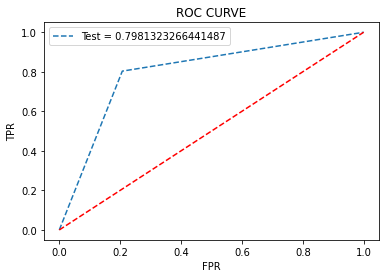

Duration: 0:00:02.581559


In [64]:

start_time = datetime.now()

dt = DecisionTreeClassifier()
accuracy_dt = cross_val_score(dt, x_under, y_under, scoring='accuracy', cv = 10)
print("Accuracy of Model with Cross Validation is:",accuracy_dt.mean() * 100)


y_pred = cross_val_predict(dt, x_under,y_under, cv = 10)
y_proba = cross_val_predict(dt, x_under, y_under, cv=10, method='predict_proba')[:,1]
acc_dt = accuracy_score(y_under,y_pred)
recall_dt = recall_score(y_under,y_pred)
f1_dt = f1_score(y_under,y_pred)
print("Accuracy:", acc_dt)
print("Recall:",recall_dt)
print("F1 Score:",f1_dt)
print("Confusion matrix:")
conf = confusion_matrix(y_under,y_pred)
print(conf)
spec_dt = specificity(conf)



fpr_test, tpr_test, weight_test = metrics.roc_curve(y_under, y_proba)
roc_auc_test_dt = metrics.roc_auc_score(y_under, y_proba)
plt.title('ROC CURVE')
plt.plot(fpr_test, tpr_test, '--', label = 'Test = {}'.format(roc_auc_test_dt))
plt.plot([0, 1], [0, 1],'r--')
plt.legend()
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()


end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

### MLP classifier

Accuracy of Model with Cross Validation is: 86.5763907123298
Accuracy: 0.8680707331611365
Recall: 0.840850387442877
F1 Score: 0.8643790849673203
Confusion matrix:
[[4506  527]
 [ 801 4232]]
Specificity 0.895291078879396


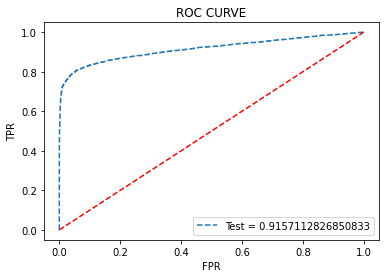

Duration: 0:08:31.840887


In [65]:
from sklearn.neural_network import MLPClassifier
start_time = datetime.now()
mlp = MLPClassifier()
accuracy_mlp = cross_val_score(mlp, x_under, y_under, scoring='accuracy', cv = 10)
print("Accuracy of Model with Cross Validation is:",accuracy_mlp.mean() * 100)


y_pred = cross_val_predict(mlp, x_under,y_under, cv = 10)
y_proba = cross_val_predict(mlp, x_under, y_under, cv=10, method='predict_proba')[:,1]
acc_mlp = accuracy_score(y_under,y_pred)
recall_mlp = recall_score(y_under,y_pred)
f1_mlp = f1_score(y_under,y_pred)
print("Accuracy:", acc_mlp)
print("Recall:",recall_mlp)
print("F1 Score:",f1_mlp)

print("Confusion matrix:")
conf = confusion_matrix(y_under,y_pred)
print(conf)
spec_mlp=specificity(conf)



fpr_test, tpr_test, weight_test = metrics.roc_curve(y_under, y_proba)
roc_auc_test_mlp = metrics.roc_auc_score(y_under, y_proba)
plt.title('ROC CURVE')
plt.plot(fpr_test, tpr_test, '--', label = 'Test = {}'.format(roc_auc_test_mlp))
plt.plot([0, 1], [0, 1],'r--')
plt.legend()
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

#### RandomForestClassifier

Accuracy of Model with Cross Validation is: 86.74628495166044
Accuracy: 0.867574011523942
Recall: 0.7814424796344128
F1 Score: 0.8550929448853136
Confusion matrix:
[[4800  233]
 [1100 3933]]
Specificity 0.9537055434134711


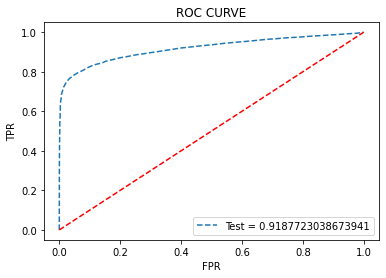

Duration: 0:00:33.679611


In [66]:
start_time = datetime.now()

rf = RandomForestClassifier()
accuracy_rf = cross_val_score(rf, x_under, y_under, scoring='accuracy', cv = 10)
print("Accuracy of Model with Cross Validation is:",accuracy_rf.mean() * 100)


y_pred = cross_val_predict(rf, x_under,y_under, cv = 10)
y_proba = cross_val_predict(rf, x_under, y_under, cv=10, method='predict_proba')[:,1]
acc_rf = accuracy_score(y_under,y_pred)
recall_rf = recall_score(y_under,y_pred)
f1_rf = f1_score(y_under,y_pred)
print("Accuracy:", acc_rf)
print("Recall:",recall_rf)
print("F1 Score:",f1_rf)

print("Confusion matrix:")
conf = confusion_matrix(y_under,y_pred)
print(conf)
spec_rf=specificity(conf)



fpr_test, tpr_test, weight_test = metrics.roc_curve(y_under, y_proba)
roc_auc_test_rf = metrics.roc_auc_score(y_under, y_proba)
plt.title('ROC CURVE')
plt.plot(fpr_test, tpr_test, '--', label = 'Test = {}'.format(roc_auc_test_rf))
plt.plot([0, 1], [0, 1],'r--')
plt.legend()
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

### KNeighborsClassifier

Accuracy of Model with Cross Validation is: 78.4115466091238
Accuracy: 0.7841247764752632
Recall: 0.6330220544406915
F1 Score: 0.7456992393212406
Confusion matrix:
[[4707  326]
 [1847 3186]]
Specificity 0.9352274985098351


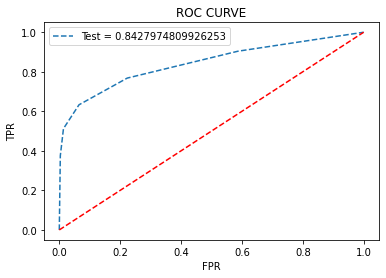

Duration: 0:00:45.991562


In [67]:
start_time = datetime.now()
knn = KNeighborsClassifier()
accuracy_knn = cross_val_score(knn, x_under, y_under, scoring='accuracy', cv = 10)
print("Accuracy of Model with Cross Validation is:",accuracy_knn.mean() * 100)


y_pred = cross_val_predict(knn, x_under,y_under, cv = 10)
y_proba = cross_val_predict(knn, x_under, y_under, cv=10, method='predict_proba')[:,1]
acc_knn = accuracy_score(y_under,y_pred)
recall_knn = recall_score(y_under,y_pred)
f1_knn = f1_score(y_under,y_pred)
print("Accuracy:", acc_knn)
print("Recall:",recall_knn)
print("F1 Score:",f1_knn)

print("Confusion matrix:")
conf = confusion_matrix(y_under,y_pred)
print(conf)
spec_knn = specificity(conf)



fpr_test, tpr_test, weight_test = metrics.roc_curve(y_under, y_proba)
roc_auc_test_knn = metrics.roc_auc_score(y_under, y_proba)
plt.title('ROC CURVE')
plt.plot(fpr_test, tpr_test, '--', label = 'Test = {}'.format(roc_auc_test_knn))
plt.plot([0, 1], [0, 1],'r--')
plt.legend()
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

###GaussianNB

Accuracy of Model with Cross Validation is: 75.88840344230545
Accuracy: 0.7588913173057819
Recall: 0.5316908404530102
F1 Score: 0.6880061704589279
Confusion matrix:
[[4963   70]
 [2357 2676]]
Specificity 0.9860917941585535


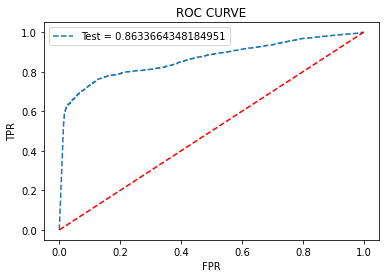

Duration: 0:00:00.716492


In [69]:
start_time = datetime.now()
nb = GaussianNB()
accuracy_nb = cross_val_score(nb, x_under, y_under, scoring='accuracy', cv = 10)
print("Accuracy of Model with Cross Validation is:",accuracy_nb.mean() * 100)


y_pred = cross_val_predict(nb, x_under,y_under, cv = 10)
y_proba = cross_val_predict(nb, x_under, y_under, cv=10, method='predict_proba')[:,1]
acc_nb = accuracy_score(y_under,y_pred)
recall_nb = recall_score(y_under,y_pred)
f1_nb = f1_score(y_under,y_pred)
print("Accuracy:", acc_nb)
print("Recall:",recall_nb)
print("F1 Score:",f1_nb)

print("Confusion matrix:")
conf = confusion_matrix(y_under,y_pred)
print(conf)
spec_nb = specificity(conf)



fpr_test, tpr_test, weight_test = metrics.roc_curve(y_under, y_proba)
roc_auc_test_nb = metrics.roc_auc_score(y_under, y_proba)
plt.title('ROC CURVE')
plt.plot(fpr_test, tpr_test, '--', label = 'Test = {}'.format(roc_auc_test_nb))
plt.plot([0, 1], [0, 1],'r--')
plt.legend()
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

### Determining if there a statistically significant difference between the algorithms

In [70]:
from scipy import stats
a = [accuracy_dt, accuracy_mlp, accuracy_knn, accuracy_rf, accuracy_nb]

#function used to determine if there is a statisfically significant difference between the algorithms
def comparision():
    for i in range(len(a)):
        for j in range(i+1, len(a)):
            model = ["DecisionTree", "MLP", "RandomForest", "KNN", "NaiveBayes"]
            print("{} vs {}  " .format(model[i] ,model[j]))
            m1 = a[i]
            m2 = a[j]
            t, p = stats.ttest_ind(m1,m2) #t test 
            if p <= 0.05:
                result = True
                print("There is a statistically significant difference")
                print("----------------------")
            else:
                result = False
                print("There is no difference")
                print("----------------------")
            
        
comparision()

DecisionTree vs MLP  
There is a statistically significant difference
----------------------
DecisionTree vs RandomForest  
There is a statistically significant difference
----------------------
DecisionTree vs KNN  
There is a statistically significant difference
----------------------
DecisionTree vs NaiveBayes  
There is a statistically significant difference
----------------------
MLP vs RandomForest  
There is no difference
----------------------
MLP vs KNN  
There is no difference
----------------------
MLP vs NaiveBayes  
There is a statistically significant difference
----------------------
RandomForest vs KNN  
There is no difference
----------------------
RandomForest vs NaiveBayes  
There is a statistically significant difference
----------------------
KNN vs NaiveBayes  
There is a statistically significant difference
----------------------


In [71]:
import plotly.graph_objects as go

In [72]:
#creating a dataframe 
df = pd.DataFrame(columns = ["Metric","KNN", "MLPClassifier", "DecisionTree", "NaiveBayes", "RandomForest"])
#avg = ["Average", accuracy_svm_bal.mean()*100, accuracy_knn_bal.mean()*100, accuracy_dt_bal.mean()*100, accuracy_nb_bal.mean()*100, accuracy_rf_bal.mean()*100, accuracy_et_bal.mean()*100]

In [73]:
Metrics = ['Accuracy', 'AUC-ROC', 'Recall','Specificity', 'F1-Score']

df['KNN'] = np.round((acc_knn,roc_auc_test_knn,recall_knn,spec_knn,f1_knn),4)
df['DecisionTree'] = np.round((acc_dt,roc_auc_test_dt,recall_dt,spec_dt,f1_dt),4)
df['NaiveBayes'] = np.round((acc_nb,roc_auc_test_nb,recall_nb,spec_nb,f1_nb),4)
df['RandomForest'] = np.round((acc_rf,roc_auc_test_rf,recall_rf,spec_rf,f1_rf),4)
df['MLPClassifier'] = np.round((acc_mlp,roc_auc_test_mlp,recall_mlp,spec_mlp,f1_mlp),4)
df['Metric'] = Metrics


In [74]:
#printing the table using plotly
fig = go.Figure(data=[go.Table(
    header=dict(values=list(df.columns),fill_color='paleturquoise',line_color='darkslategray',align='center'),
    cells=dict(values=[df.Metric, df.KNN, df.MLPClassifier, df.DecisionTree, df.NaiveBayes, df.RandomForest],
               fill_color='pink',
               line_color='darkslategray',
               align='center'))
])

fig.update_layout(width=800, height=600)
fig.show()

#### Summary :

 From the table above it can be inferred that the MLP classifier and Random Forest performed evenly. Since the dataset is from the medical domain, it is absolutely essential that the recall, f1 score and specificity are high. Taking these 3 metrics into consideration, we can tell that the MLP classifier performs slightly better than other algorithms.



# Task 2 : Using gender as the target variable

In [76]:
#splitting the data into x,y 
y = data['gender']
x = data.drop(columns=['gender'])

In [77]:
#normalising the values
sc = MinMaxScaler() 
x_norm = sc.fit_transform(x)
x_norm = pd.DataFrame(x_norm, columns=x.columns)

In [78]:
#undersampling 
print("The count of each class in y before under sampling is :")
print(y.value_counts())
undersampler  = NearMiss(version=2) #used for undersampling
x_under, y_under = undersampler.fit_resample(x_norm, y)
print("The count of each class in y after under sampling is :")
print(y_under.value_counts())

The count of each class in y before under sampling is :
0    29997
1    26045
Name: gender, dtype: int64
The count of each class in y after under sampling is :
1    26045
0    26045
Name: gender, dtype: int64


In [79]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k = 92)

X_new = selector.fit_transform(x_under, y_under)
names = x.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])

ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

                                         Feat_names    F_Scores
3                                    num_procedures  403.238460
64                                diag1_circulatory  261.067152
0                                               age  234.385194
50  discharge_disposition_id_Discharged/transferred  214.020154
33                                      diabetesMed  189.280383
49      discharge_disposition_id_Discharged to home  182.739846
74                                diag2_circulatory  113.843623
63                                      diag1_Other  110.089957
42                                   A1Cresult_None   85.716840
58                      admission_type_id_emergency   83.051920
35                             race_AfricanAmerican   71.485553
55                     admission_source_id_referral   70.984174
57                       admission_type_id_elective   68.270672
41                                     A1Cresult_>8   55.901004
54                    admission_source_i

In [80]:
#dropping the columns with least score
x_under = x_under.drop(columns= ['citoglipton','examide','glimepiride-pioglitazone','max_glu_serum_>200','metformin-rosiglitazone'])

### DecisionTreeClassifier

Accuracy of Model with Cross Validation is: 50.70838932616625
Accuracy: 0.5060280284123632
Recall: 0.49030524092916106
F1 Score: 0.498137348598623
Confusion matrix:
[[13589 12456]
 [13275 12770]]
Specificity 0.5217508158955654


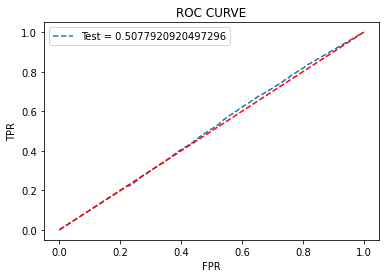

Duration: 0:00:17.393891


In [81]:
start_time = datetime.now()
dt = DecisionTreeClassifier(max_depth=20, criterion='entropy', splitter='best', min_samples_leaf=3)
accuracy_dt = cross_val_score(dt, x_under, y_under, scoring='accuracy', cv = 10)
print("Accuracy of Model with Cross Validation is:",accuracy_dt.mean() * 100)


y_pred = cross_val_predict(dt, x_under,y_under, cv = 10)
y_proba = cross_val_predict(dt, x_under, y_under, cv=10, method='predict_proba')[:,1]
acc_dt = accuracy_score(y_under,y_pred)
recall_dt = recall_score(y_under,y_pred)
f1_dt = f1_score(y_under,y_pred)
print("Accuracy:", acc_dt)
print("Recall:",recall_dt)
print("F1 Score:",f1_dt)
print("Confusion matrix:")
conf = confusion_matrix(y_under,y_pred)
print(conf)
specificity(conf)



fpr_test, tpr_test, weight_test = metrics.roc_curve(y_under, y_proba)
roc_auc_test= metrics.roc_auc_score(y_under, y_proba)
plt.title('ROC CURVE')
plt.plot(fpr_test, tpr_test, '--', label = 'Test = {}'.format(roc_auc_test))
plt.plot([0, 1], [0, 1],'r--')
plt.legend()
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

### MLPClassifier

Accuracy of Model with Cross Validation is: 49.54693799193704
Accuracy: 0.5030332117488961
Recall: 0.5493568823190632
F1 Score: 0.5250353191567437
Confusion matrix:
Confusion matrix:
[[11895 14150]
 [11737 14308]]
Specificity 0.45670954117872914


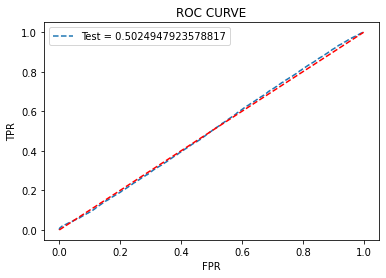

Duration: 0:52:35.071984


In [82]:
start_time = datetime.now()
mlp = MLPClassifier(hidden_layer_sizes = 128)
accuracy_mlp = cross_val_score(mlp, x_under, y_under, scoring='accuracy', cv = 10)
print("Accuracy of Model with Cross Validation is:",accuracy_mlp.mean() * 100)


y_pred = cross_val_predict(mlp, x_under,y_under, cv = 10)
y_proba = cross_val_predict(mlp, x_under, y_under, cv=10, method='predict_proba')[:,1]
acc_mlp = accuracy_score(y_under,y_pred)
recall_mlp = recall_score(y_under,y_pred)
f1_mlp = f1_score(y_under,y_pred)
print("Accuracy:", acc_mlp)
print("Recall:",recall_mlp)
print("F1 Score:",f1_mlp)
print("Confusion matrix:")
print("Confusion matrix:")
conf = confusion_matrix(y_under,y_pred)
print(conf)
specificity(conf)



fpr_test, tpr_test, weight_test = metrics.roc_curve(y_under, y_proba)
roc_auc_test = metrics.roc_auc_score(y_under, y_proba)
plt.title('ROC CURVE')
plt.plot(fpr_test, tpr_test, '--', label = 'Test = {}'.format(roc_auc_test))
plt.plot([0, 1], [0, 1],'r--')
plt.legend()
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

### RandomForestClassifier

Accuracy of Model with Cross Validation is: 49.89825302361298
Accuracy: 0.5037627183720483
Recall: 0.5151852562871952
F1 Score: 0.5093669925026099
Confusion matrix:
Confusion matrix:
[[12823 13222]
 [12627 13418]]
Specificity 0.49234018045690153


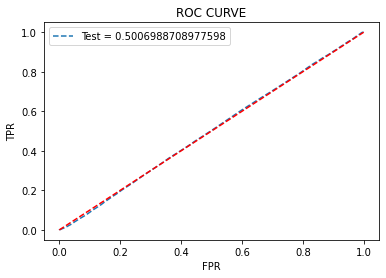

Duration: 0:03:58.959628


In [84]:
start_time = datetime.now()
rf = RandomForestClassifier()
accuracy_rf = cross_val_score(rf, x_under, y_under, scoring='accuracy', cv = 10)
print("Accuracy of Model with Cross Validation is:",accuracy_rf.mean() * 100)


y_pred = cross_val_predict(rf, x_under,y_under, cv = 10)
y_proba = cross_val_predict(rf, x_under, y_under, cv=10, method='predict_proba')[:,1]
acc_rf = accuracy_score(y_under,y_pred)
recall_rf = recall_score(y_under,y_pred)
f1_rf = f1_score(y_under,y_pred)
print("Accuracy:", acc_rf)
print("Recall:",recall_rf)
print("F1 Score:",f1_rf)
print("Confusion matrix:")
print("Confusion matrix:")
conf = confusion_matrix(y_under,y_pred)
print(conf)
specificity(conf)



fpr_test, tpr_test, weight_test = metrics.roc_curve(y_under, y_proba)
roc_auc_test = metrics.roc_auc_score(y_under, y_proba)
plt.title('ROC CURVE')
plt.plot(fpr_test, tpr_test, '--', label = 'Test = {}'.format(roc_auc_test))
plt.plot([0, 1], [0, 1],'r--')
plt.legend()
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

### KNeighborsClassifier

Accuracy of Model with Cross Validation is: 49.082357458245355
Accuracy: 0.49082357458245346
Recall: 0.5025532731810328
F1 Score: 0.4967268173279445
Confusion matrix:
Confusion matrix:
[[12478 13567]
 [12956 13089]]
Specificity 0.47909387598387404


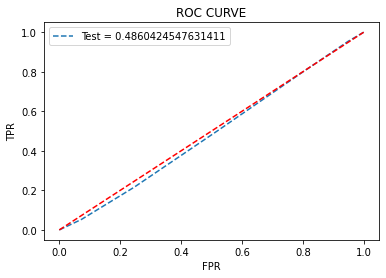

Duration: 0:22:23.457150


In [85]:
start_time = datetime.now()
knn = KNeighborsClassifier()
accuracy_knn = cross_val_score(knn, x_under, y_under, scoring='accuracy', cv = 10)
print("Accuracy of Model with Cross Validation is:",accuracy_knn.mean() * 100)


y_pred = cross_val_predict(knn, x_under,y_under, cv = 10)
y_proba = cross_val_predict(knn, x_under, y_under, cv=10, method='predict_proba')[:,1]
acc_knn = accuracy_score(y_under,y_pred)
recall_knn = recall_score(y_under,y_pred)
f1_knn = f1_score(y_under,y_pred)
print("Accuracy:", acc_knn)
print("Recall:",recall_knn)
print("F1 Score:",f1_knn)
print("Confusion matrix:")
print("Confusion matrix:")
conf = confusion_matrix(y_under,y_pred)
print(conf)
specificity(conf)



fpr_test, tpr_test, weight_test = metrics.roc_curve(y_under, y_proba)
roc_auc_test = metrics.roc_auc_score(y_under, y_proba)
plt.title('ROC CURVE')
plt.plot(fpr_test, tpr_test, '--', label = 'Test = {}'.format(roc_auc_test))
plt.plot([0, 1], [0, 1],'r--')
plt.legend()
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

### GaussianNB

Accuracy of Model with Cross Validation is: 51.414858898061034
Accuracy: 0.5141485889806104
Recall: 0.3395661355346516
F1 Score: 0.4113871057772816
Confusion matrix:
Confusion matrix:
[[17938  8107]
 [17201  8844]]
Specificity 0.6887310424265694


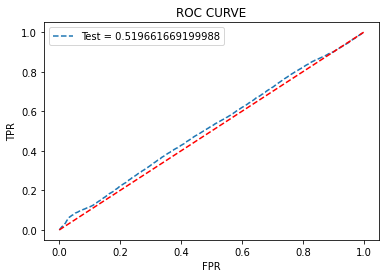

Duration: 0:00:03.239167


In [86]:
start_time = datetime.now()
nb = GaussianNB()
accuracy_nb = cross_val_score(nb, x_under, y_under, scoring='accuracy', cv = 10)
print("Accuracy of Model with Cross Validation is:",accuracy_nb.mean() * 100)


y_pred = cross_val_predict(nb, x_under,y_under, cv = 10)
y_proba = cross_val_predict(nb, x_under, y_under, cv=10, method='predict_proba')[:,1]
acc_nb = accuracy_score(y_under,y_pred)
recall_nb = recall_score(y_under,y_pred)
f1_nb = f1_score(y_under,y_pred)
print("Accuracy:", acc_nb)
print("Recall:",recall_nb)
print("F1 Score:",f1_nb)
print("Confusion matrix:")
print("Confusion matrix:")
conf = confusion_matrix(y_under,y_pred)
print(conf)
specificity(conf)



fpr_test, tpr_test, weight_test = metrics.roc_curve(y_under, y_proba)
roc_auc_test = metrics.roc_auc_score(y_under, y_proba)
plt.title('ROC CURVE')
plt.plot(fpr_test, tpr_test, '--', label = 'Test = {}'.format(roc_auc_test))
plt.plot([0, 1], [0, 1],'r--')
plt.legend()
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

####  Determining if there a statistically significant difference between the algorithms

In [87]:
a = [accuracy_dt, accuracy_mlp, accuracy_knn, accuracy_rf, accuracy_nb]

#function used to determine if there is a statisfically significant difference between the algorithms
def comparision():
    for i in range(len(a)):
        for j in range(i+1, len(a)):
            model = ["DecisionTree", "MLP", "RandomForest", "KNN", "NaiveBayes"]
            print("{} vs {}  " .format(model[i] ,model[j]))
            m1 = a[i]
            m2 = a[j]
            t, p = stats.ttest_ind(m1,m2) #t test 
            if p <= 0.05:
                result = True
                print("There is a statistically significant difference")
                print("----------------------")
            else:
                result = False
                print("There is no difference")
                print("----------------------")
            
        
comparision()

DecisionTree vs MLP  
There is no difference
----------------------
DecisionTree vs RandomForest  
There is no difference
----------------------
DecisionTree vs KNN  
There is no difference
----------------------
DecisionTree vs NaiveBayes  
There is no difference
----------------------
MLP vs RandomForest  
There is no difference
----------------------
MLP vs KNN  
There is no difference
----------------------
MLP vs NaiveBayes  
There is no difference
----------------------
RandomForest vs KNN  
There is no difference
----------------------
RandomForest vs NaiveBayes  
There is no difference
----------------------
KNN vs NaiveBayes  
There is no difference
----------------------


In [88]:
#creating a dataframe 
df = pd.DataFrame(columns = ["Metric","KNN", "MLPClassifier", "DecisionTree", "NaiveBayes", "RandomForest"])
#avg = ["Average", accuracy_svm_bal.mean()*100, accuracy_knn_bal.mean()*100, accuracy_dt_bal.mean()*100, accuracy_nb_bal.mean()*100, accuracy_rf_bal.mean()*100, accuracy_et_bal.mean()*100]

In [91]:
Metrics = ['Accuracy', 'AUC-ROC', 'Recall','Specificity', 'F1-Score']

df['KNN'] = np.round((acc_knn,0.4860,recall_knn,0.47909,f1_knn),4)
df['DecisionTree'] = np.round((acc_dt,0.50779,recall_dt,0.52175,f1_dt),4)
df['NaiveBayes'] = np.round((acc_nb,0.5196,recall_nb,0.6860,f1_nb),4)
df['RandomForest'] = np.round((acc_rf,0.5006,recall_rf,0.4923,f1_rf),4)
df['MLPClassifier'] = np.round((acc_mlp,0.50249,recall_mlp,0.4567,f1_mlp),4)
df['Metric'] = Metrics


In [92]:
#printing the table using plotly
fig = go.Figure(data=[go.Table(
    header=dict(values=list(df.columns),fill_color='paleturquoise',line_color='darkslategray',align='center'),
    cells=dict(values=[df.Metric, df.KNN, df.MLPClassifier, df.DecisionTree, df.NaiveBayes, df.RandomForest],
               fill_color='pink',
               line_color='darkslategray',
               align='center'))
])

fig.update_layout(width=800, height=600)
fig.show()

#### Summary:
Also, we can notice from the table that no algorithm performed well on the data. The models are unable to predict the gender of the patient using the given data. However, to choose one, we can say that the MLP classifier performs better when compared to other algorithms. Apart from that, there is no significant difference between the performance of any algorithm.

The given data consists of several null values which has been removed and from the data cleaning process we can conclude that the data does not consist of many outliers. We can also see that there were more than one enounter for every patient. 

The models perform better in case of task 1 than task 2. This might be due to the lack of data due to undersampling. Also, one limitation is that there no hyperparameter tuning performed for the models. 

#B: Semi-supervised learning & evaluation of results

In [80]:
### Semi supervised learning
from sklearn.semi_supervised import LabelSpreading, LabelPropagation

## LabelPropagation

In [81]:
#this function is used for label propogation
def label_prop(percentage):
  start_time = datetime.now()
  label_prop_model = LabelPropagation()

  rng = np.random.RandomState(42)
  random_unlabeled_points = rng.rand(len(y_under)) < percentage
  labels = np.copy(y_under)
  labels[random_unlabeled_points] = -1
  accuracy_lp = cross_val_score(label_prop_model, x_under, labels, cv = 4, scoring="accuracy")
  y_pred = cross_val_predict(label_prop_model, x_under, labels, cv = 4)




  y_proba = cross_val_predict(label_prop_model, x_under, labels, cv=4, method='predict_proba')[:,1]
  acc_lp = accuracy_score(y_under,y_pred)
  recall_lp = recall_score(y_under,y_pred)
  f1_lp = f1_score(y_under,y_pred)
  print("Accuracy:", acc_lp)
  print("Recall:",recall_lp)
  print("F1 Score:",f1_lp)
  print("Confusion matrix:")
  print("Confusion matrix:")
  conf = confusion_matrix(y_under,y_pred)
  print(conf)
  spec_lp = specificity(conf)



  fpr_test, tpr_test, weight_test = metrics.roc_curve(y_under, y_proba)
  roc_auc_test_lp = metrics.roc_auc_score(y_under, y_proba)
  plt.title('ROC CURVE')
  plt.plot(fpr_test, tpr_test, '--', label = 'Test = {}'.format(roc_auc_test_lp))
  plt.plot([0, 1], [0, 1],'r--')
  plt.legend()
  plt.ylabel('TPR')
  plt.xlabel('FPR')
  plt.show()
  
  end_time = datetime.now()
  print('Duration: {}'.format(end_time - start_time))
  return accuracy_lp,acc_lp,recall_lp,f1_lp,roc_auc_test_lp,spec_lp

Accuracy: 0.7366381879594676
Recall: 0.6604410888138287
F1 Score: 0.7149155823206795
Confusion matrix:
Confusion matrix:
[[4091  942]
 [1709 3324]]
Specificity 0.8128352871051063


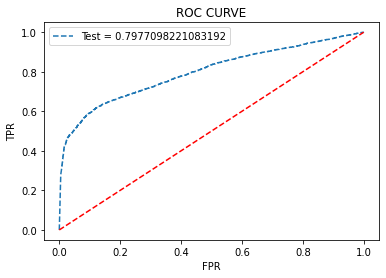

Duration: 0:00:32.052732


In [82]:
#0% unlablled data
acc_0,acc_lp0,recall_lp0,f1_lp0,roc_auc_test_lp0,spec_lp0 = label_prop(0.0)

Accuracy: 0.7335585138088615
Recall: 0.6558712497516391
F1 Score: 0.7111158983196897
Confusion matrix:
Confusion matrix:
[[4083  950]
 [1732 3301]]
Specificity 0.8112457778660839


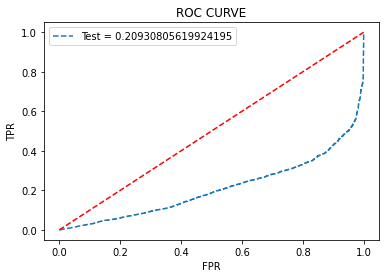

Duration: 0:02:57.986339


In [83]:
# 10% unlablled data
acc_1,acc_lp1,recall_lp1,f1_lp1,roc_auc_test_lp1,spec_lp1 = label_prop(0.1)

Accuracy: 0.7296840850387443
Recall: 0.6459368170077489
F1 Score: 0.704976688713
Confusion matrix:
Confusion matrix:
[[4094  939]
 [1782 3251]]
Specificity 0.8134313530697397


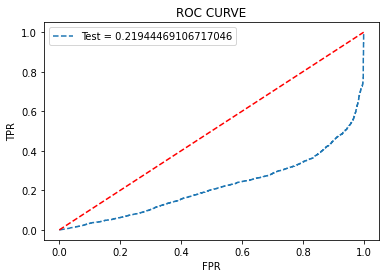

Duration: 0:04:55.658072


In [84]:
 #20% unlablled data
 acc_2,acc_lp2,recall_lp2,f1_lp2,roc_auc_test_lp2,spec_lp2 = label_prop(0.2)

Accuracy: 0.7195509636399762
Recall: 0.6113649910590105
F1 Score: 0.6855296869778322
Confusion matrix:
Confusion matrix:
[[4166  867]
 [1956 3077]]
Specificity 0.8277369362209418


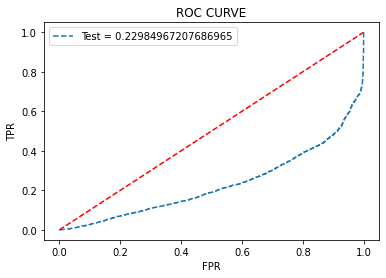

Duration: 0:08:24.591078


In [85]:
# 50% unlablled data
acc_5,acc_lp5,recall_lp5,f1_lp5,roc_auc_test_lp5,spec_lp5 = label_prop(0.5)

Accuracy: 0.6794158553546592
Recall: 0.5364593681700774
F1 Score: 0.6259418105946447
Confusion matrix:
Confusion matrix:
[[4139  894]
 [2333 2700]]
Specificity 0.822372342539241


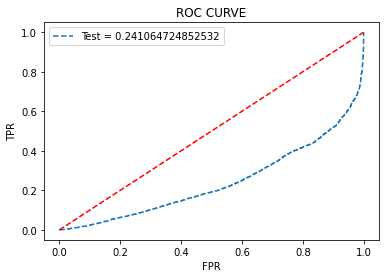

Duration: 0:08:23.509607


In [86]:
# 90% unlablled data
acc_9,acc_lp9,recall_lp9,f1_lp9,roc_auc_test_lp9,spec_lp9 = label_prop(0.9)

Accuracy: 0.6626266640174846
Recall: 0.4913570435128154
F1 Score: 0.5929033804842962
Confusion matrix:
Confusion matrix:
[[4197  836]
 [2560 2473]]
Specificity 0.8338962845221538


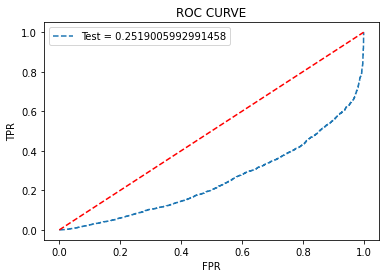

Duration: 0:08:24.244529


In [87]:
# 95% unlablled data
acc_95,acc_lp95,recall_lp95,f1_lp95,roc_auc_test_lp95,spec_lp95 = label_prop(0.95)

##LabelSpreading

In [88]:
#this function is used for label spreading
def label_spread(percentage):
  start_time = datetime.now()
  label_prop_model = LabelSpreading()

  rng = np.random.RandomState(42)
  random_unlabeled_points = rng.rand(len(y_under)) < percentage
  labels = np.copy(y_under)
  labels[random_unlabeled_points] = -1
  accuracy_lp = cross_val_score(label_prop_model, x_under, labels, cv = 4, scoring="accuracy")
  y_pred = cross_val_predict(label_prop_model, x_under, labels, cv = 4)
  print(accuracy_lp)

  y_proba = cross_val_predict(label_prop_model, x_under, labels, cv=4, method='predict_proba')[:,1]
  acc_lp = accuracy_score(y_under,y_pred)
  recall_lp = recall_score(y_under,y_pred)
  f1_lp = f1_score(y_under,y_pred)
  print("Accuracy:", acc_lp)
  print("Recall:",recall_lp)
  print("F1 Score:",f1_lp)
  print("Confusion matrix:")
  print("Confusion matrix:")
  conf = confusion_matrix(y_under,y_pred)
  print(conf)
  spec = specificity(conf)



  fpr_test, tpr_test, weight_test = metrics.roc_curve(y_under, y_proba)
  roc_auc_test = metrics.roc_auc_score(y_under, y_proba)
  plt.title('ROC CURVE')
  plt.plot(fpr_test, tpr_test, '--', label = 'Test = {}'.format(roc_auc_test))
  plt.plot([0, 1], [0, 1],'r--')
  plt.legend()
  plt.ylabel('TPR')
  plt.xlabel('FPR')
  plt.show()
  end_time = datetime.now()
  print('Duration: {}'.format(end_time - start_time))
  return accuracy_lp,acc_lp,recall_lp,f1_lp,roc_auc_test,spec

[0.72069925 0.76519666 0.75397456 0.71303657]
Accuracy: 0.73822769719849
Recall: 0.6600437115040731
F1 Score: 0.7160254337751913
Confusion matrix:
Confusion matrix:
[[4109  924]
 [1711 3322]]
Specificity 0.8164116828929068


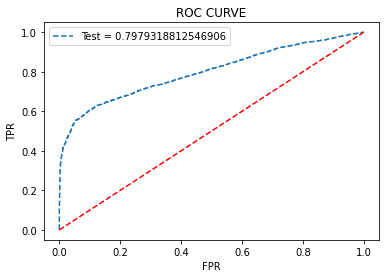

Duration: 0:00:41.662046


In [89]:
acc_ls_0, acc_ls0,recall_ls0,f1_ls0,roc_auc_test_ls0,spec0 = label_spread(0.0)

[0.64839094 0.6829559  0.67249603 0.63751987]
Accuracy: 0.7375322869064176
Recall: 0.6638187959467514
F1 Score: 0.7166452166452166
Confusion matrix:
Confusion matrix:
[[4083  950]
 [1692 3341]]
Specificity 0.8112457778660839


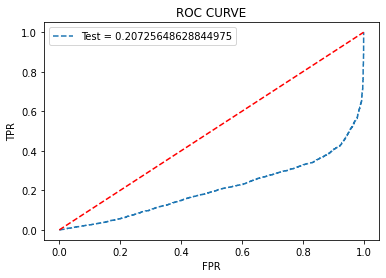

Duration: 0:00:42.482917


In [109]:
acc_ls_1, acc_ls1,recall_ls1,f1_ls1,roc_auc_test_ls1,spec1 = label_spread(0.1)

[0.57608264 0.59634485 0.59578696 0.55564388]
Accuracy: 0.734055235446056
Recall: 0.6578581363004172
F1 Score: 0.7121195827508333
Confusion matrix:
Confusion matrix:
[[4078  955]
 [1722 3311]]
Specificity 0.8102523345916948


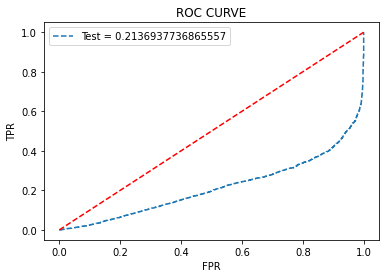

Duration: 0:00:42.538483


In [110]:
acc_ls_2, acc_ls2,recall_ls2,f1_ls2,roc_auc_test_ls2,spec2 = label_spread(0.2)

[0.35677394 0.35717124 0.36248013 0.33267091]
Accuracy: 0.7216371945161931
Recall: 0.6435525531492152
F1 Score: 0.6980603448275863
Confusion matrix:
Confusion matrix:
[[4025 1008]
 [1794 3239]]
Specificity 0.799721835883171


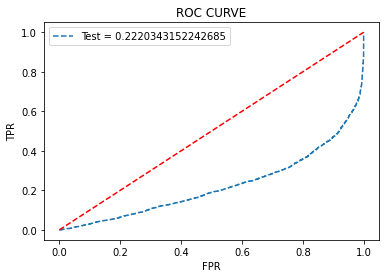

Duration: 0:00:42.299922


In [111]:
acc_ls_5, acc_ls5,recall_ls5,f1_ls5,roc_auc_test_ls5,spec5 = label_spread(0.5)

[0.07191101 0.06158125 0.06478537 0.06120827]
Accuracy: 0.693026028213789
Recall: 0.601629246969998
F1 Score: 0.6621473868357752
Confusion matrix:
Confusion matrix:
[[3948 1085]
 [2005 3028]]
Specificity 0.7844228094575799


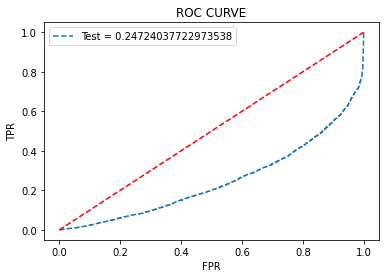

Duration: 0:00:42.120000


In [112]:
acc_ls_9, acc_ls9,recall_ls9,f1_ls9,roc_auc_test_ls9,spec9 = label_spread(0.9)

[0.03496226 0.02820818 0.03338633 0.0317965 ]
Accuracy: 0.6715676534869859
Recall: 0.5579177428968806
F1 Score: 0.6294552790854069
Confusion matrix:
Confusion matrix:
[[3952 1081]
 [2225 2808]]
Specificity 0.7852175640770912


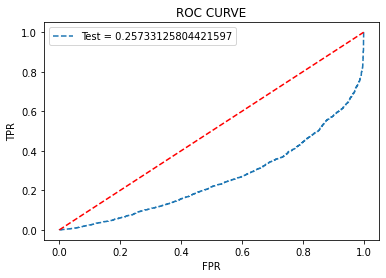

Duration: 0:00:41.625920


In [113]:
acc_ls_95, acc_ls95,recall_ls95,f1_ls95,roc_auc_test_ls95,spec95 = label_spread(0.95)

## Self training

In [72]:
def self_traning(percent):
  model1 = RandomForestClassifier()
  if(percent == 0):
    start_time = datetime.now()
    acc_self = cross_val_score(model1, x_under, y_under, scoring = "accuracy", cv = 4)
    y_pred = cross_val_predict(model1, x_under, y_under, cv = 4)
    y_proba = cross_val_predict(model1, x_under, y_under, cv=4, method='predict_proba')[:,1]
    acc_st = accuracy_score(y_under,y_pred)
    recall_st = recall_score(y_under,y_pred)
    f1_st = f1_score(y_under,y_pred)
    print("Accuracy:", acc_st)
    print("Recall:",recall_st)
    print("F1 Score:",f1_st)
    print("Confusion matrix:")
   
    conf = confusion_matrix(y_under,y_pred)
    print(conf)
    spec_st = specificity(conf)



    fpr_test, tpr_test, weight_test = metrics.roc_curve(y_under, y_proba)
    roc_auc_test_st = metrics.roc_auc_score(y_under, y_proba)
    plt.title('ROC CURVE')
    plt.plot(fpr_test, tpr_test, '--', label = 'Test = {}'.format(roc_auc_test_st))
    plt.plot([0, 1], [0, 1],'r--')
    plt.legend()
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.show()
    end_time = datetime.now()
    print('Duration: {}'.format(end_time - start_time))
    return acc_self,acc_st,recall_st,f1_st,roc_auc_test_st,spec_st
  
  else:
    counter = 0
    x_train, x_test, y_train, _ = train_test_split(x_under, y_under, test_size=percent, random_state=1)
    start_time = datetime.now()
    

    while(counter < 100):
    
      
    
      model1.fit(x_train,y_train)

      y_pred = model1.predict(x_test)
      
      y_pred_prob = model1.predict_proba(x_test)[:,1]
      a = np.where((y_pred_prob > 0.99))
      a = np.array(a[0])
      x_test1 = x_test.iloc[a]
      y_pred = np.array(y_pred)[a]
      
      x_test = pd.concat([x_test, x_test1]).drop_duplicates(keep=False)
      final_X = pd.concat([x_train,x_test1])
      final_Y = np.concatenate((y_train,y_pred))
    
      counter+= 1
      x_train = final_X
      y_train = final_Y




    acc_self = cross_val_score(model1, x_train, y_train, scoring = "accuracy", cv = 4)
    y_pred = cross_val_predict(model1, x_train, y_train, cv = 4)
    y_proba = cross_val_predict(model1, x_train, y_train, cv=4, method='predict_proba')[:,1]
    acc_st = accuracy_score(y_train,y_pred)
    recall_st = recall_score(y_train,y_pred)
    f1_st = f1_score(y_train,y_pred)
    print("Accuracy:", acc_st)
    print("Recall:",recall_st)
    print("F1 Score:",f1_st)
    print("Confusion matrix:")
    
    conf = confusion_matrix(y_train,y_pred)
    print(conf)
    spec_st = specificity(conf)



    fpr_test, tpr_test, weight_test = metrics.roc_curve(y_train, y_proba)
    roc_auc_test_st = metrics.roc_auc_score(y_train, y_proba)
    plt.title('ROC CURVE')
    plt.plot(fpr_test, tpr_test, '--', label = 'Test = {}'.format(roc_auc_test_st))
    plt.plot([0, 1], [0, 1],'r--')
    plt.legend()
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.show()
 
    
    end_time = datetime.now()
    print('Duration: {}'.format(end_time - start_time))
    return acc_self,acc_st,recall_st,f1_st,roc_auc_test_st,spec_st



Accuracy: 0.858334989072124
Recall: 0.7750844426783231
F1 Score: 0.8454703077589945
Confusion matrix:
[[4739  294]
 [1132 3901]]
Specificity 0.9415855354659249


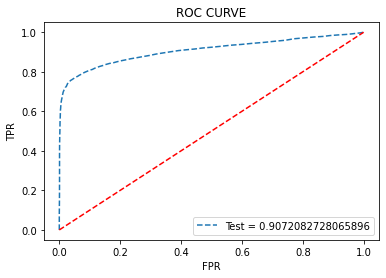

Duration: 0:00:11.818264


In [73]:
acc_self_0, acc_st0,recall_st0,f1_st0,roc_auc_test_st0,spec_st0 = self_traning(0)

Accuracy: 0.875886524822695
Recall: 0.7979057591623037
F1 Score: 0.8683760683760683
Confusion matrix:
[[4341  190]
 [ 965 3810]]
Specificity 0.9580666519532112


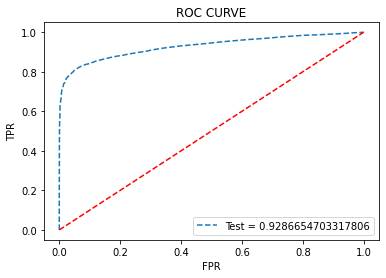

Duration: 0:02:11.421509


In [74]:
acc_self_1, acc_st1,recall_st1,f1_st1,roc_auc_test_st1,spec_st1 = self_traning(0.1)

Accuracy: 0.8751758087201125
Recall: 0.8046408839779006
F1 Score: 0.8724092488319157
Confusion matrix:
[[3826  181]
 [ 884 3641]]
Specificity 0.954829049163963


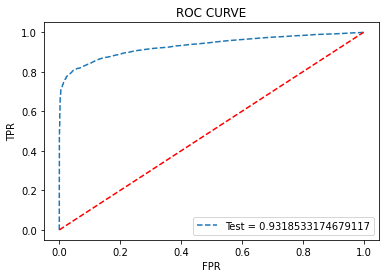

Duration: 0:02:02.750234


In [75]:
acc_self_2, acc_st2,recall_st2,f1_st2,roc_auc_test_st2,spec_st2 = self_traning(0.2)

Accuracy: 0.8846466287571081
Recall: 0.8390457910611462
F1 Score: 0.8960468521229868
Confusion matrix:
[[2385  123]
 [ 587 3060]]
Specificity 0.9509569377990431


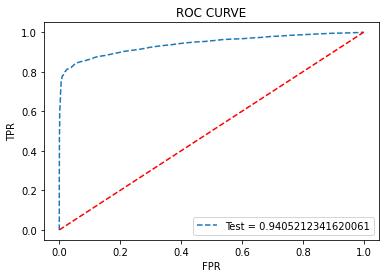

Duration: 0:01:36.460161


In [76]:
acc_self_5, acc_st5,recall_st5,f1_st5,roc_auc_test_st5,spec_st5 = self_traning(0.5)

Accuracy: 0.8974260468689973
Recall: 0.9014218009478673
F1 Score: 0.9344141488577745
Confusion matrix:
[[ 434   59]
 [ 208 1902]]
Specificity 0.8803245436105477


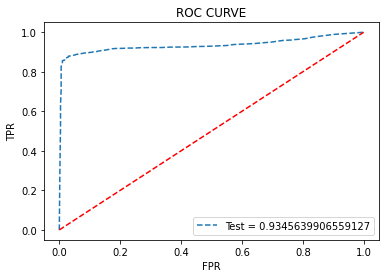

Duration: 0:00:57.221761


In [77]:
acc_self_9, acc_st9,recall_st9,f1_st9,roc_auc_test_st9,spec_st9 = self_traning(0.9)

Accuracy: 0.9271457085828343
Recall: 0.9390313390313391
F1 Score: 0.957582800697269
Confusion matrix:
[[ 210   39]
 [ 107 1648]]
Specificity 0.8433734939759037


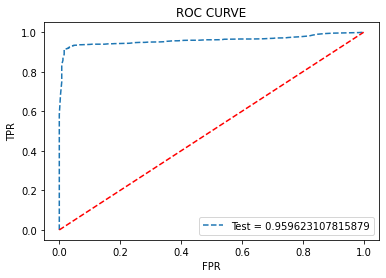

Duration: 0:00:50.487731


In [78]:
acc_self_95, acc_st95,recall_st95,f1_st95,roc_auc_test_st95,spec_st95 = self_traning(0.95)

In [97]:
from scipy import stats

lp = [acc_0, acc_1, acc_2, acc_5, acc_9, acc_95]
ls = [acc_ls_0, acc_ls_1, acc_ls_2, acc_ls_5, acc_ls_9, acc_ls_95]
sl = [acc_self_0,acc_self_1,acc_self_2,acc_self_5,acc_self_9,acc_self_95]
percent = [0,10,20,50,90,95]



#function used to determine if there is a statisfically significant difference between the algorithms
def comparision_ssl(a,b):
    for i in range(len(percent)):
           
            print("Comparision of {} percentage".format(percent[i]))

            m1 = a[i]
            m2 = b[i]
            t, p = stats.ttest_ind(m1,m2)#t test 
            if p <= 0.05:
                result = True
                print("There is a statistically significant difference")
                print("----------------------")
            else:
                result = False
                print("There is no difference")
                print("----------------------")
                
print("************************************************")          
print("Comaparing Label Propogration and Label spreading")     
print("************************************************") 
comparision_ssl(lp,ls)

print("************************************************")
print("Comaparing Label Propogration and Self Training") 
print("************************************************")   
comparision_ssl(lp,sl)

print("************************************************")
print("Comaparing Label Spreading and Self Training")  
print("************************************************")  
comparision_ssl(ls,sl)

************************************************
Comaparing Label Propogration and Label spreading
************************************************
Comparision of 0 percentage
There is no difference
----------------------
Comparision of 10 percentage
There is no difference
----------------------
Comparision of 20 percentage
There is no difference
----------------------
Comparision of 50 percentage
There is no difference
----------------------
Comparision of 90 percentage
There is no difference
----------------------
Comparision of 95 percentage
There is no difference
----------------------
************************************************
Comaparing Label Propogration and Self Training
************************************************
Comparision of 0 percentage
There is a statistically significant difference
----------------------
Comparision of 10 percentage
There is a statistically significant difference
----------------------
Comparision of 20 percentage
There is a statistically sign

In [151]:
from prettytable import PrettyTable 
  
# Specify the Column Names while initializing the Table 
#myTable = PrettyTable(["0% unlabelled", "10% unlabelled", "20% unlabelled", "50% unlabelled", "90% unlabelled", "95% unlabelled"]) 
myTable1 = PrettyTable(["Label Propagation","Accuracy","Recall","F1 score","Specificity","AUC score"])  

myTable1.add_row(["0% unlabelled",0.736638, 0.66,0.714,0.812,0.79]) 
myTable1.add_row(["10% unlabelled",0.7355,0.6558,0.7111,0.811,0.209]) 
myTable1.add_row(["20% unlabelled",0.726,0.64593,0.704,0.813,0.21]) 
myTable1.add_row(["50% unlabelled",0.719,0.611,0.6855,0.877,0.229]) 
myTable1.add_row(["90% unlabelled",0.6794,0.5364,0.6259,0.8223,0.241]) 
myTable1.add_row(["95% unlabelled",0.662,0.491,0.5929,0.833,0.25]) 

  
print(myTable1)

+-------------------+----------+---------+----------+-------------+-----------+
| Label Propagation | Accuracy |  Recall | F1 score | Specificity | AUC score |
+-------------------+----------+---------+----------+-------------+-----------+
|   0% unlabelled   | 0.736638 |   0.66  |  0.714   |    0.812    |    0.79   |
|   10% unlabelled  |  0.7355  |  0.6558 |  0.7111  |    0.811    |   0.209   |
|   20% unlabelled  |  0.726   | 0.64593 |  0.704   |    0.813    |    0.21   |
|   50% unlabelled  |  0.719   |  0.611  |  0.6855  |    0.877    |   0.229   |
|   90% unlabelled  |  0.6794  |  0.5364 |  0.6259  |    0.8223   |   0.241   |
|   95% unlabelled  |  0.662   |  0.491  |  0.5929  |    0.833    |    0.25   |
+-------------------+----------+---------+----------+-------------+-----------+


In [152]:
# Specify the Column Names while initializing the Table 
#myTable = PrettyTable(["0% unlabelled", "10% unlabelled", "20% unlabelled", "50% unlabelled", "90% unlabelled", "95% unlabelled"]) 
myTable2 = PrettyTable(["Label Spreading","Accuracy","Recall","F1 score","Specificity","AUC score"])  

myTable2.add_row(["0% unlabelled",0.7382, 0.66,0.716,0.8164,0.799]) 
myTable2.add_row(["10% unlabelled",0.7375,0.663,0.716,0.811,0.207]) 
myTable2.add_row(["20% unlabelled",0.734,0.657,0.7121,0.81,0.213]) 
myTable2.add_row(["50% unlabelled",0.721,0.643,0.698,0.77,0.223]) 
myTable2.add_row(["90% unlabelled",0.6930,0.6061,0.6621,0.7844,0.24]) 
myTable2.add_row(["95% unlabelled",0.6715,0.5579,0.6294,0.7852,0.257]) 
  
print(myTable2)

+-----------------+----------+--------+----------+-------------+-----------+
| Label Spreading | Accuracy | Recall | F1 score | Specificity | AUC score |
+-----------------+----------+--------+----------+-------------+-----------+
|  0% unlabelled  |  0.7382  |  0.66  |  0.716   |    0.8164   |   0.799   |
|  10% unlabelled |  0.7375  | 0.663  |  0.716   |    0.811    |   0.207   |
|  20% unlabelled |  0.734   | 0.657  |  0.7121  |     0.81    |   0.213   |
|  50% unlabelled |  0.721   | 0.643  |  0.698   |     0.77    |   0.223   |
|  90% unlabelled |  0.693   | 0.6061 |  0.6621  |    0.7844   |    0.24   |
|  95% unlabelled |  0.6715  | 0.5579 |  0.6294  |    0.7852   |   0.257   |
+-----------------+----------+--------+----------+-------------+-----------+


In [153]:
myTable3 = PrettyTable(["Self training","Accuracy","Recall","F1 score","Specificity","AUC score"])  

myTable3.add_row(["0% unlabelled",0.8583, 0.8046, 0.84547,0.9415,0.907]) 
myTable3.add_row(["10% unlabelled",0.8751,0.8046,0.8724,0.9548,0.931]) 
myTable3.add_row(["20% unlabelled",0.8846,0.839,0.8960,0.9509,0.9405]) 
myTable3.add_row(["50% unlabelled",0.8846,0.8390,0.89604,0.9509,0.9405]) 
myTable3.add_row(["90% unlabelled",0.89742,0.9014,0.9344,0.8803,0.9346]) 
myTable3.add_row(["95% unlabelled",0.92714,0.9390,0.9575,0.8433,0.9596]) 

  
print(myTable3)

+----------------+----------+--------+----------+-------------+-----------+
| Self training  | Accuracy | Recall | F1 score | Specificity | AUC score |
+----------------+----------+--------+----------+-------------+-----------+
| 0% unlabelled  |  0.8583  | 0.8046 | 0.84547  |    0.9415   |   0.907   |
| 10% unlabelled |  0.8751  | 0.8046 |  0.8724  |    0.9548   |   0.931   |
| 20% unlabelled |  0.8846  | 0.839  |  0.896   |    0.9509   |   0.9405  |
| 50% unlabelled |  0.8846  | 0.839  | 0.89604  |    0.9509   |   0.9405  |
| 90% unlabelled | 0.89742  | 0.9014 |  0.9344  |    0.8803   |   0.9346  |
| 95% unlabelled | 0.92714  | 0.939  |  0.9575  |    0.8433   |   0.9596  |
+----------------+----------+--------+----------+-------------+-----------+


In [154]:
print(myTable1)
print(myTable2)
print(myTable3)

+-------------------+----------+---------+----------+-------------+-----------+
| Label Propagation | Accuracy |  Recall | F1 score | Specificity | AUC score |
+-------------------+----------+---------+----------+-------------+-----------+
|   0% unlabelled   | 0.736638 |   0.66  |  0.714   |    0.812    |    0.79   |
|   10% unlabelled  |  0.7355  |  0.6558 |  0.7111  |    0.811    |   0.209   |
|   20% unlabelled  |  0.726   | 0.64593 |  0.704   |    0.813    |    0.21   |
|   50% unlabelled  |  0.719   |  0.611  |  0.6855  |    0.877    |   0.229   |
|   90% unlabelled  |  0.6794  |  0.5364 |  0.6259  |    0.8223   |   0.241   |
|   95% unlabelled  |  0.662   |  0.491  |  0.5929  |    0.833    |    0.25   |
+-------------------+----------+---------+----------+-------------+-----------+
+-----------------+----------+--------+----------+-------------+-----------+
| Label Spreading | Accuracy | Recall | F1 score | Specificity | AUC score |
+-----------------+----------+--------+-------

### Summary:
As we can see from the tables, self training algorithm gives the best results when compared to Label propagation and Label Spreading. Apart from that, the results obtained for 0 percent unlabelled data or 10 percent unlabelled data is higher than other percentages for all the 3 techniques. This is due to the presence of high percentage of labelled data which makes it easy for the prediction of the unlabelled instances. 

Also, we can observe that the results in the of Label propagation and Label Spreading are very similar. It can be noted that the auc-roc value for all the percentages of unlabelled data except for 0 percentage is very low, whereas value of other metrics is slightly higher. Also, no statistical difference was found between the Label propagation and Label Spreading.

It was also observed that the models in SSL produced significantly faster results for the RBF kernel without any memory issues.

# Conclusion


In conclusion, prepossessing the data along with several machine algorithms were used on the dataset. From the results obtained, we can say that MLPClassfier performs better when compared to other ML algorithms in both the problem statements. The performance of the algorithms can be increased in future by tuning the hyperparameters. Also, the design of the self-training algorithm can be further improved. Apart from that, a different problem statement, for example, to determine which drug contributes the most can be used to derive more insights from the dataset. 